
resimler/picture_0.xml
picture_0.png
road
7 9 94 92

resimler/picture_1.xml
picture_1.png
road
1 30 89 57
road
25 8 100 24
road
1 59 30 99
not_road
1 1 16 19

resimler/picture_10.xml
picture_10.png
road
2 6 27 37
road
37 16 70 67
road
74 35 100 92
not_road
2 55 31 100
not_road
76 1 100 24

resimler/picture_100.xml
picture_100.png
road
1 2 226 220

resimler/picture_101.xml
picture_101.png
road
91 187 158 233
road
91 102 113 135
road
97 140 128 186
road
52 198 84 226
road
14 188 46 239
not_road
19 120 86 179
not_road
35 95 82 139
not_road
116 60 157 135
not_road
136 138 162 186

resimler/picture_102.xml
picture_102.png
road
55 113 170 191
road
69 4 132 34
road
82 42 126 95
road
180 103 225 135
not_road
154 8 224 86
not_road
3 60 73 103
not_road
6 134 46 223

resimler/picture_103.xml
picture_103.png
road
39 36 188 183
not_road
1 1 223 32
not_road
1 188 225 222

resimler/picture_104.xml
picture_104.png
road
20 108 135 171
not_road
4 184 178 253
not_road
2 21 181 97

resimler/picture_105.x

196 1 226 103
not_road
157 3 188 102
not_road
227 1 258 103
not_road
125 79 169 194

resimler/picture_2.118.xml
picture_2.118.png
not_road
2 3 57 43
not_road
1 49 108 113
not_road
156 43 294 109
not_road
1 147 223 166
not_road
63 1 126 46
not_road
155 3 293 41
road
1 116 296 146
road
113 50 155 115
road
132 11 153 50

resimler/picture_2.119.xml
picture_2.119.png
road
122 105 200 149
not_road
4 2 189 89
not_road
2 161 208 224
not_road
2 92 121 157

resimler/picture_2.12.xml
picture_2.12.png
not_road
1 2 47 35
not_road
2 39 48 60
not_road
19 64 90 100
not_road
49 1 54 65
not_road
56 2 100 63
not_road
1 63 17 97
not_road
93 65 99 100

resimler/picture_2.120.xml
picture_2.120.png
road
29 17 200 199
[INFO] compiling model...
[INFO] training network...
Epoch 1/25


D:\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
C:\Users\Muhammet\AppData\Local\Temp/ipykernel_12636/1106328022.py:109: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  H=model.fit_generator(aug.flow(trainX,trainY,batch_size=BS),


7/7 [==============================] - 1s 91ms/step - loss: 0.6625 - accuracy: 0.6256 - val_loss: 0.5508 - val_accuracy: 0.6548
Epoch 2/25
7/7 [==============================] - 1s 74ms/step - loss: 0.4710 - accuracy: 0.7854 - val_loss: 0.5475 - val_accuracy: 0.7500
Epoch 3/25
7/7 [==============================] - 0s 67ms/step - loss: 0.4219 - accuracy: 0.8174 - val_loss: 0.4201 - val_accuracy: 0.7857
Epoch 4/25
7/7 [==============================] - 0s 65ms/step - loss: 0.3777 - accuracy: 0.8311 - val_loss: 0.3349 - val_accuracy: 0.8452
Epoch 5/25
7/7 [==============================] - 0s 62ms/step - loss: 0.3892 - accuracy: 0.8174 - val_loss: 0.3802 - val_accuracy: 0.7857
Epoch 6/25
7/7 [==============================] - 0s 62ms/step - loss: 0.3724 - accuracy: 0.8493 - val_loss: 0.3174 - val_accuracy: 0.8214
Epoch 7/25
7/7 [==============================] - 1s 86ms/step - loss: 0.3497 - accuracy: 0.8539 - val_loss: 0.3357 - val_accuracy: 0.8214
Epoch 8/25
7/7 [======================

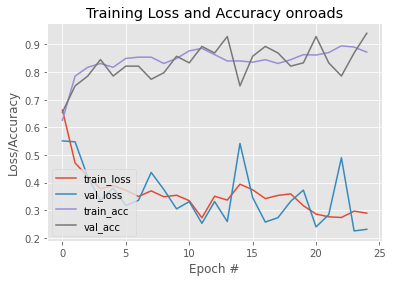

In [7]:
import cv2
import os
import xml.etree.ElementTree as ET
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras import backend as K

def build(width,height,depth,classes):
    model=Sequential()
    inputShape=(height,width,depth)
    
    if K.image_data_format()=="channels_first":
        inputShape=(depth,height,width)
        
    model.add(Conv2D(20,(5,5),padding="same",input_shape=inputShape))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

    model.add(Conv2D(50,(5,5),padding="same"))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    
    model.add(Flatten())
    model.add(Dense(500))
    model.add(Activation("relu"))
    
    model.add(Dense(classes))
    model.add(Activation("softmax"))
    
    return model

modelname="roads"
data=[]
labels=[]
path='resimler/'
resize=28

EPOCHS=25
INIT_LR=1e-3
BS=32

for filename in os.listdir(path):
    if not filename.endswith('.xml'):continue
    fullname=os.path.join(path,filename) 
    print()
    print(fullname)
    tree=ET.parse(fullname)
    
    root=tree.getroot()
    fileimg=root[1].text
    image=cv2.imread(path+fileimg)
    
    print(root[1].text)
    objects=root.findall('object')
    for obj in objects:
        name=obj[0].text
        print(name)
        items=obj.findall('bndbox')
        xmin=int(items[0][0].text)
        ymin=int(items[0][1].text)
        xmax=int(items[0][2].text)
        ymax=int(items[0][3].text)
        
        print(xmin,ymin,xmax,ymax)
        
        patch=image[ymin:ymax,xmin:xmax,:]
        patch=cv2.resize(patch,(resize,resize))
        
        x=img_to_array(patch)
        
        data.append(x)
        
        label=0
        if name=="road":
            label=1
        labels.append(label)
        
data=np.array(data,dtype="float")/255.0
labels=np.array(labels)

(trainX,testX,trainY,testY)=train_test_split(data,labels,test_size=0.25,random_state=42)

trainY=to_categorical(trainY,num_classes=2)
testY=to_categorical(testY,num_classes=2)

aug=ImageDataGenerator(rotation_range=30,width_shift_range=0.1,
                      height_shift_range=0.1,shear_range=0.2,zoom_range=0.2,
                      horizontal_flip=True,fill_mode="nearest")

print("[INFO] compiling model...")
model=build(width=resize,height=resize,depth=3,classes=2)
opt=Adam(lr=INIT_LR,decay=INIT_LR/EPOCHS)
model.compile(loss="binary_crossentropy",optimizer=opt,metrics=["accuracy"])

print("[INFO] training network...")
H=model.fit_generator(aug.flow(trainX,trainY,batch_size=BS),
                     validation_data=(testX,testY),steps_per_epoch=len(trainX)//BS,
                     epochs=EPOCHS,verbose=1)

print("[INFO] saving network...")
model.save(modelname+".model")

plt.style.use("ggplot")
plt.figure()
N=EPOCHS
plt.plot(np.arange(0,N),H.history["loss"],label="train_loss")
plt.plot(np.arange(0,N),H.history["val_loss"],label="val_loss")
plt.plot(np.arange(0,N),H.history["accuracy"],label="train_acc")
plt.plot(np.arange(0,N),H.history["val_accuracy"],label="val_acc")

plt.title("Training Loss and Accuracy on"+modelname)
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")